<center> <span style="color:indigo">Métodos Estadísticos Básicos</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/MCD.jpg" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Unidad 2. Probabilidad </span>  </center>
<center> <span style="color:Blue"> M. en C. Iván A. Toledano Juárez </span>  </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import seaborn as sns

%matplotlib inline

### Ejercicio: Tirada de moneda

In [2]:
# Creamos nuestra lista (o espacio muestral)

R_Moneda = ['Sello','Aguila']
R_Moneda


['Sello', 'Aguila']

In [3]:
# hacemos varias tiradas de moneda
#  ensayos de tirada de moneda
n = 1000
Resultados = []

count = 0

for i in range(0,n):
    Trial = np.random.choice(R_Moneda)
    Resultados.append(Trial)
    if Trial == 'Aguila':
        count += 1
        
#print(Resultados)
print('probabilidad de tener aguila = ', float(count) / float(n))

probabilidad de tener aguila =  0.505


### Método de Monte Carlo

El **método de Monte Carlo** es una técnica estadística que utiliza **números aleatorios** para resolver problemas matemáticos que, en principio, no tienen una solución analítica sencilla. Es especialmente útil para **aproximar integrales, estimar probabilidades** y **modelar fenómenos complejos**.

Una de las aplicaciones más conocidas es la estimación del valor de $\pi$ mediante una simulación inspirada en un experimento de **Von Neumann**.

#### Etapas del método de Monte Carlo

1. **Generar números aleatorios**  
   Se genera una secuencia de números aleatorios $r_1, r_2, \dots, r_m$ distribuidos **uniformemente** en el intervalo $[0, 1]$.

2. **Transformar la secuencia si es necesario**  
   Usamos esta secuencia para construir una nueva secuencia $x_1, x_2, \dots, x_m$, **distribuida de acuerdo con una función de densidad de probabilidad (PDF)** deseada $f(x)$, ya sea mediante métodos de transformación directa o por técnicas como aceptación-rechazo.

3. **Estimar propiedades de la función $f(x)$**  
   La secuencia $\{x_i\}$ se interpreta como una muestra simulada, y se usa para **estimar propiedades estadísticas** de $f(x)$. Por ejemplo, la probabilidad de que $x$ se encuentre dentro de un intervalo específico puede estimarse como:

   \begin{equation}
   \mathbb{P}(a \leq x \leq b) \approx \frac{\text{Número de } x_i \in [a, b]}{m}
   \end{equation}

4. **Relación con la integración**  
   Formalmente, un cálculo por Monte Carlo equivale a **aproximar una integral mediante un promedio muestral**. Si se quiere calcular:

   \begin{equation}
   I = \int_a^b f(x) \, dx
   \end{equation}

   entonces, se puede aproximar por:

   \begin{equation}
   I \approx \frac{1}{m} \sum_{i=1}^m f(x_i)
   \end{equation}

   donde $x_i \sim \mathcal{U}(a, b)$.

#### Ejemplo: Estimación de $\pi$ mediante Monte Carlo

Aplicamos el método de Monte Carlo para estimar el valor de $\pi$, siguiendo las etapas generales del procedimiento:

1. Simulamos $m$ puntos aleatorios $(x_i, y_i)$ en el cuadrado $[-1, 1] \times [-1, 1]$. Esto equivale a generar dos secuencias de números aleatorios independientes, $x_1, x_2, \dots, x_m$ y $y_1, y_2, \dots, y_m$, ambos uniformemente distribuidos en $[-1, 1]$.

2. No es necesario transformar las variables, ya que trabajamos directamente con una interpretación geométrica. Recordamos que el cuarto de círculo de radio 1, centrado en el origen, está contenido en el cuadrado unitario.

El criterio para que un punto esté dentro del círculo es:

\begin{equation}
x_i^2 + y_i^2 \leq 1
\end{equation}

3. Estimar una propiedad: la probabilidad geométrica

La **proporción de puntos que caen dentro del círculo** nos da una estimación de la probabilidad de que un punto aleatorio $(x, y)$ se encuentre dentro del cuarto de círculo. Como el área del cuarto de círculo es $\frac{\pi}{4}$, estimamos:

\begin{equation}
\frac{\pi}{4} \approx \frac{\text{Número de puntos dentro del círculo}}{m}
\end{equation}

Por lo tanto:

\begin{equation}
\pi \approx 4 \cdot \frac{\text{Número de puntos dentro del círculo}}{m}
\end{equation}

4. Interpretación como una integral

Este cálculo equivale a aproximar la integral:

\begin{equation}
\pi = 4 \int_0^1 \sqrt{1 - x^2} \, dx
\end{equation}

Pero en lugar de calcular esta integral directamente, se estima el área bajo la curva por simulación aleatoria de puntos en el plano.

In [6]:
n_puntos = 1
x = np.random.uniform(-1,1,n_puntos).tolist()
y = np.random.uniform(-1,1,n_puntos).tolist()
print(x,y)

[0.22058057338324555] [0.35801170565141915]


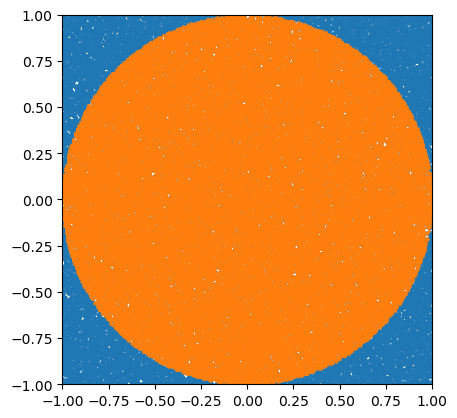

P= 0.78658
Pi = 3.14632


In [7]:
n_puntos = 100000

x = np.random.uniform(-1,1,n_puntos).tolist()
y = np.random.uniform(-1,1,n_puntos).tolist()


lista_dentro_circulo_x = []
lista_dentro_circulo_y = []

for i in range(0,len(x)):
    radio = np.sqrt(x[i]**2 + y[i]**2)
    if radio<=1.0:
        lista_dentro_circulo_x.append(x[i])
        lista_dentro_circulo_y.append(y[i])

x_circ = np.array(lista_dentro_circulo_x)
y_circ = np.array(lista_dentro_circulo_y)
        
plt.scatter(x,y, s=1.0)
plt.scatter(x_circ,y_circ, s=1.0)

plt.axis('square')
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)
plt.show()

print('P=',len(x_circ) / n_puntos)

print('Pi =',(len(x_circ) / n_puntos)*4)

3.141159199999999


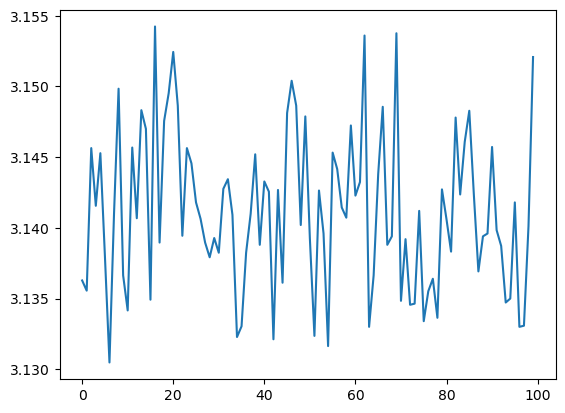

In [8]:
## Se hace un promedio de varias estimaciones de pi



# aplicacion de numeros aleatorios para recrear experimento de Von Neumann
# para calcular el valor exacto de pi

# los numeros entre 0 y 1 tienen que ser variables uniformes

n = 100000
pi_avg = 0 # pi empieza valiendo cero y luego se ira promediando
pi_value_list = []

for i in range(100):
    
    value = 0
    x = np.random.uniform(0,1,n).tolist()  # se hacen n experimentos
    y = np.random.uniform(0,1,n).tolist()
    
    for j in range(n): # filtro de datos
        
        z = np.sqrt(x[j]*x[j] + y[j]*y[j]) ## esto es ver que el radio es menor a 1
    
        if (z<=1):
                
            value += 1
    
    float_value = float(value) #numero de veces que cayo en el circulo
    pi_value = float_value * 4 / n   # aproximacion de pi numero de casos del circulo / numero de casos no
    pi_value_list.append(pi_value) # añadir la aproximacion a la lista
    pi_avg += pi_value # se le suman valueres a la lista

pi = pi_avg/100 # se saca el promedio entre las diferentes aproximaciones

print(pi)
plt.plot(pi_value_list)

## Ejercicio: Distribución, tirada de una moneda

In [13]:
## Carga de datos (archivo .csv)

mainpath = "../Datasets"
filename = "Prop_coinflip_2024B.csv"
fullpath = os.path.join(mainpath,filename)

data = pd.read_csv(fullpath, sep=',', index_col=0)
data.head(5)  # Mostrar las primeras 10 líneas

,ALARCÓN GUTIERREZ EDUARDO BASILIO,ARELLANO VALDES ADAN,BELTRAN VALDEZ DANIEL ALBERTO,CALOCA CAMARENA OSCAR MANUEL,CASTILLO RIOS JESSICA JAZMIN,FURRER FRANCO GRETEL,GAMAS GARCÍA EDGAR ABRAHAM,GÓMEZ GARCÍA ALEJANDRO,GÓMEZ SANDOVAL JUAN CARLOS,GONZALEZ FLORES GRACIELA,...,ORTIZ MACÍAS GUILLERMO,PÉREZ HUÍZAR SABRINA,PRADO DURÁN MARIA PALOMA,RADILLO DÍAZ JUAN CARLOS,RODARTE FRANCO LUIS GERARDO,ROMERO NEVAREZ MIGUEL ANGEL,SANDOVAL ROSAS JORGE,SANTOS MORALES JESÚS ALBERTO,VÁZQUEZ FLORES FRANCISCO JAVIER,ZUÑIGA GONZALEZ JOSE DE JESUS NICOLAS
ADAME BUENROSTRO LUIS DANIEL,,,,,,,,,,,,,,,,,,,,,
a,a,s,s,a,a,s,a,a,s,s,...,s,a,s,a,s,s,s,s,s,s
a,a,a,a,s,a,s,a,s,s,s,...,a,s,a,s,a,a,s,a,a,a
s,a,s,s,a,a,a,a,s,s,a,...,s,a,s,a,s,a,s,a,s,a
a,s,a,s,a,s,s,s,a,a,s,...,s,a,a,a,a,s,a,s,a,a
a,s,a,a,a,s,s,a,s,s,a,...,s,s,a,s,a,s,a,a,s,a


In [14]:
data.shape

(100, 24)

In [15]:
R_Moneda = ['a','s']
R_Moneda

['a', 's']

In [16]:
count = 0
count_s = 0
for i in range(0,100):
    count = count + 1 
    a = np.random.choice(R_Moneda)
    
    if a == 'a':
        count_s = count_s + 1
print(count_s / count)
#np.random.sample(R_Moneda,1)

0.49


In [17]:
## cambiamos los valores por algo aleatorio
for col in data.columns:
    for i in range(0,len(data[col])):
        data[col][i] = np.random.choice(R_Moneda)

In [18]:
filename = 'Prop_coinflip_2024B_2.xlsx'
fullpath = os.path.join(mainpath,filename)
data.to_excel(fullpath)

In [19]:
data

,ALARCÓN GUTIERREZ EDUARDO BASILIO,ARELLANO VALDES ADAN,BELTRAN VALDEZ DANIEL ALBERTO,CALOCA CAMARENA OSCAR MANUEL,CASTILLO RIOS JESSICA JAZMIN,FURRER FRANCO GRETEL,GAMAS GARCÍA EDGAR ABRAHAM,GÓMEZ GARCÍA ALEJANDRO,GÓMEZ SANDOVAL JUAN CARLOS,GONZALEZ FLORES GRACIELA,...,ORTIZ MACÍAS GUILLERMO,PÉREZ HUÍZAR SABRINA,PRADO DURÁN MARIA PALOMA,RADILLO DÍAZ JUAN CARLOS,RODARTE FRANCO LUIS GERARDO,ROMERO NEVAREZ MIGUEL ANGEL,SANDOVAL ROSAS JORGE,SANTOS MORALES JESÚS ALBERTO,VÁZQUEZ FLORES FRANCISCO JAVIER,ZUÑIGA GONZALEZ JOSE DE JESUS NICOLAS
ADAME BUENROSTRO LUIS DANIEL,,,,,,,,,,,,,,,,,,,,,
a,s,s,s,s,a,a,s,s,s,s,...,a,a,s,a,a,s,a,s,s,a
a,s,s,a,a,s,s,a,s,s,s,...,a,a,s,s,s,s,s,s,a,a
s,s,a,a,s,s,s,a,a,a,s,...,s,s,s,s,a,s,s,a,a,s
a,s,s,a,s,a,s,s,s,s,s,...,s,a,a,a,s,a,a,s,a,s
a,a,s,a,s,s,a,s,a,a,s,...,a,a,a,s,a,s,a,a,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a,a,a,s,a,s,a,a,s,a,a,...,s,s,s,s,a,a,s,s,s,a
s,a,s,a,a,s,a,a,s,s,s,...,a,a,a,s,a,a,a,a,s,a
s,a,s,s,s,s,a,a,a,s,a,...,a,s,a,a,s,s,a,a,a,a


In [20]:
for col in data.columns:
    df = pd.value_counts(data[col]).to_frame()
    print(col,'->',df.index.to_list(), 'probabilidad de obtener un aguila = ',df[col][0] / (df[col][0] + df[col][1]))

ALARCÓN GUTIERREZ EDUARDO BASILIO -> ['s', 'a'] probabilidad de obtener un aguila =  0.58
ARELLANO VALDES ADAN -> ['s', 'a'] probabilidad de obtener un aguila =  0.58
BELTRAN VALDEZ DANIEL ALBERTO -> ['s', 'a'] probabilidad de obtener un aguila =  0.5
CALOCA CAMARENA OSCAR MANUEL -> ['a', 's'] probabilidad de obtener un aguila =  0.53
CASTILLO RIOS JESSICA JAZMIN -> ['s', 'a'] probabilidad de obtener un aguila =  0.56
FURRER FRANCO GRETEL -> ['a', 's'] probabilidad de obtener un aguila =  0.55
GAMAS GARCÍA EDGAR ABRAHAM  -> ['a', 's'] probabilidad de obtener un aguila =  0.51
GÓMEZ GARCÍA ALEJANDRO -> ['a', 's'] probabilidad de obtener un aguila =  0.54
GÓMEZ SANDOVAL JUAN CARLOS -> ['a', 's'] probabilidad de obtener un aguila =  0.54
GONZALEZ FLORES GRACIELA -> ['a', 's'] probabilidad de obtener un aguila =  0.52
JIMENEZ GUZMÁN JOSAFAT -> ['s', 'a'] probabilidad de obtener un aguila =  0.53
LAMAS TORRES RICARDO ARTURO -> ['a', 's'] probabilidad de obtener un aguila =  0.54
LÓPEZ AGUIL

ALARCÓN GUTIERREZ EDUARDO BASILIO -> [25, 12, 5, 2, 0, 1, 1, 0, 0, 0, 1, 0] 1


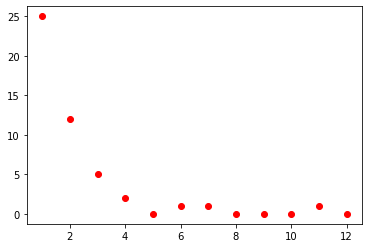

ARELLANO VALDES ADAN -> [29, 3, 3, 4, 6, 1, 0, 0, 0, 0, 0, 0] 1


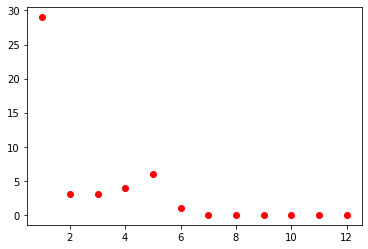

BELTRAN VALDEZ DANIEL ALBERTO -> [23, 9, 6, 8, 0, 1, 0, 0, 0, 0, 0, 0] 1


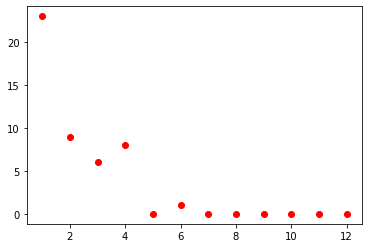

CALOCA CAMARENA OSCAR MANUEL -> [33, 13, 3, 3, 2, 0, 0, 1, 0, 0, 0, 0] 2


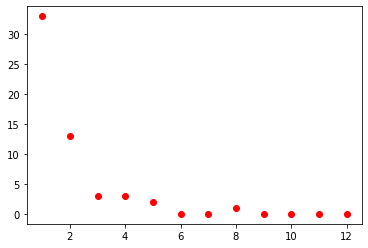

CASTILLO RIOS JESSICA JAZMIN -> [20, 13, 7, 4, 1, 0, 0, 1, 0, 0, 0, 0] 1


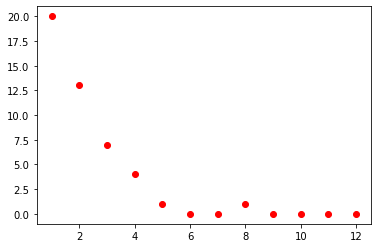

FURRER FRANCO GRETEL -> [26, 9, 6, 4, 1, 2, 0, 0, 0, 0, 0, 0] 2


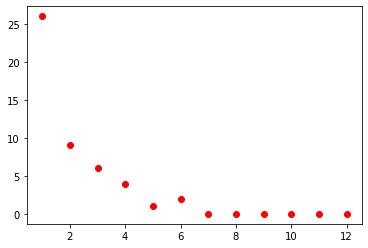

GAMAS GARCÍA EDGAR ABRAHAM  -> [33, 15, 5, 2, 0, 2, 0, 0, 0, 0, 0, 0] 1


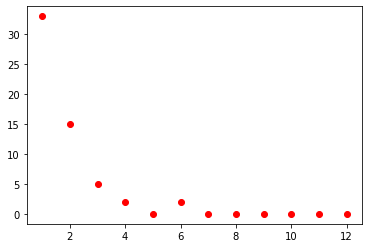

GÓMEZ GARCÍA ALEJANDRO -> [16, 33, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0] 2


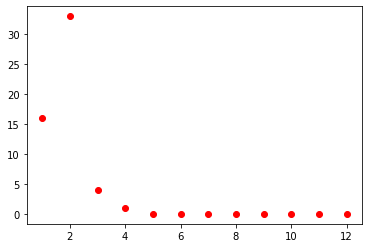

GÓMEZ SANDOVAL JUAN CARLOS -> [38, 16, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0] 2


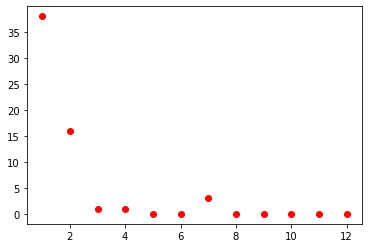

GONZALEZ FLORES GRACIELA -> [34, 20, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0] 2


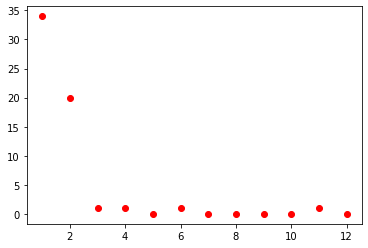

JIMENEZ GUZMÁN JOSAFAT -> [21, 23, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0] 2


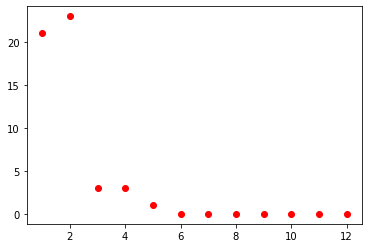

LAMAS TORRES RICARDO ARTURO -> [23, 16, 6, 2, 2, 1, 0, 0, 0, 0, 0, 0] 1


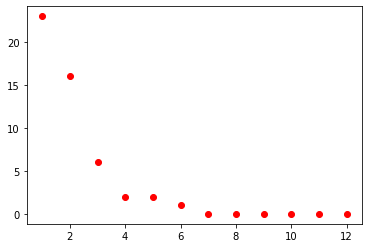

LÓPEZ AGUILAR HERNÁNDEZ JOSÉ FERNANDO -> [27, 12, 7, 5, 1, 0, 0, 0, 0, 0, 0, 0] 2


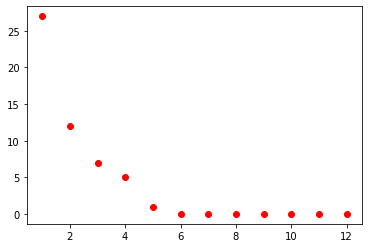

MORENO SANCHEZ KAREN ANDREA  -> [17, 9, 8, 4, 1, 1, 0, 0, 0, 0, 0, 1] 2


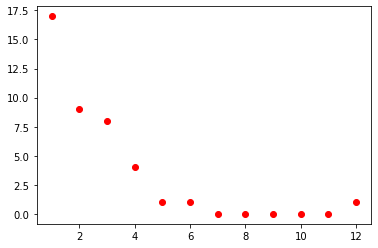

ORTIZ MACÍAS GUILLERMO  -> [24, 15, 9, 1, 1, 1, 0, 0, 0, 0, 0, 0] 1


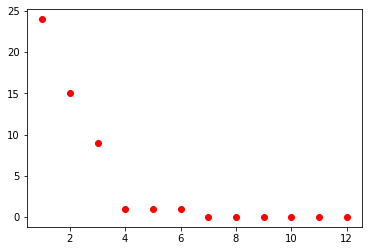

PÉREZ HUÍZAR SABRINA  -> [16, 15, 11, 3, 1, 0, 0, 0, 0, 0, 0, 0] 2


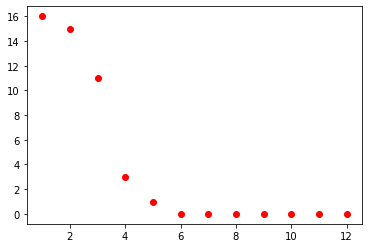

PRADO DURÁN MARIA PALOMA -> [37, 14, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0] 1


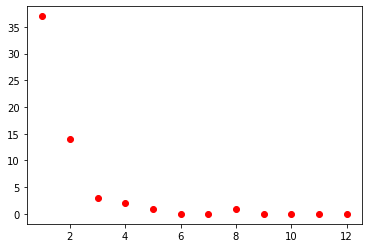

RADILLO DÍAZ JUAN CARLOS -> [18, 15, 6, 3, 1, 1, 0, 1, 0, 0, 0, 0] 2


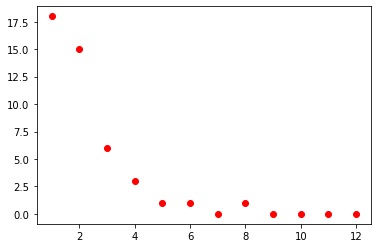

RODARTE FRANCO LUIS GERARDO  -> [27, 9, 5, 3, 2, 1, 0, 1, 0, 0, 0, 0] 1


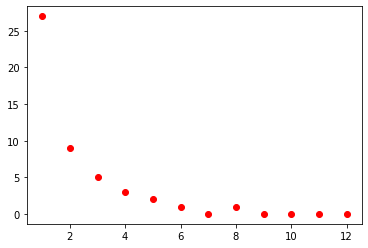

ROMERO NEVAREZ MIGUEL ANGEL -> [20, 8, 6, 4, 4, 0, 1, 0, 0, 0, 0, 0] 1


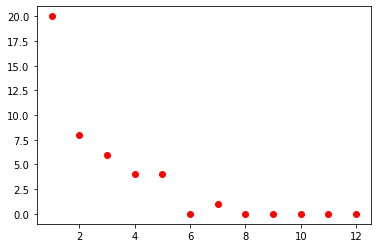

SANDOVAL ROSAS JORGE  -> [16, 14, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0] 2


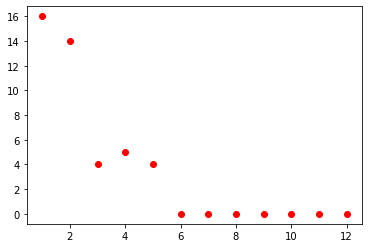

SANTOS MORALES JESÚS ALBERTO -> [24, 11, 11, 0, 2, 0, 0, 0, 1, 0, 0, 0] 1


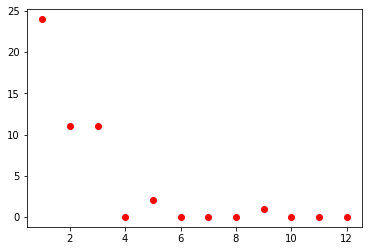

VÁZQUEZ FLORES FRANCISCO JAVIER  -> [24, 13, 7, 4, 0, 0, 1, 0, 0, 0, 0, 0] 1


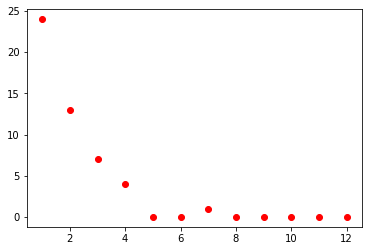

ZUÑIGA GONZALEZ JOSE DE JESUS NICOLAS -> [18, 9, 1, 7, 3, 0, 1, 0, 1, 0, 0, 0] 1


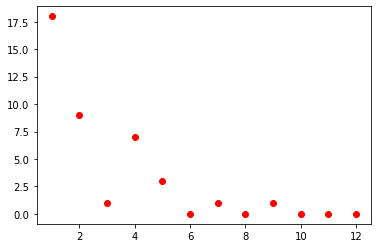

In [53]:
### Construimos la distribucion de probabilidad (para todos)

for col in data.columns:

    x_obs = [0,0,0,0,0,0,0,0,0,0,0,0]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12] # en la distribucion geómetrica x empieza en 1 y no tiene límite
    count = 0 
    ## ponemos un contador a resetear cada vez que tengamos un caso de exito

    if data[col][1]=='a':
        a=1
        for i in range(2,len(data[col])): # empezamos a contar desde el cuarto caso, el anterior sabemos que es varon
            count += 1 ## Aumenta 1 para ver hasta que punto se alcanza otro varón
    
            if (data[col][i]=='a'): ## en el caso que encuentre un varón
                x_obs[count-1] += 1 ## en este caso aumenta la frecuencia para la correspondente intento x 
                #(índice -1 por index python)
                count=0
                
        print(col,'->',x_obs,a)  # contiene la frecuencia observada
        plt.scatter(x,x_obs,color='red') # graficamos la distribucion
        plt.show()
                
    if data[col][1]=='s':
        a=2
        for i in range(2,len(data[col])): # empezamos a contar desde el cuarto caso, el anterior sabemos que es varon
            count += 1 ## Aumenta 1 para ver hasta que punto se alcanza otro varón
    
            if (data[col][i]=='s'): ## en el caso que encuentre un varón
                x_obs[count-1] += 1 ## en este caso aumenta la frecuencia para la correspondente intento x 
                #(índice -1 por index python)
        
                count = 0 #reseteamos el contador
                    
        print(col,'->',x_obs,a)  # contiene la frecuencia observada
        plt.scatter(x,x_obs,color='red') # graficamos la distribucion
        plt.show()

    

### Distribución Geométrica

La **distribución geométrica** es una distribución de probabilidad discreta que modela el número de ensayos necesarios **hasta obtener el primer éxito** en una secuencia de ensayos de Bernoulli independientes (experimentos con solo dos posibles resultados: éxito o fracaso).

Se usa cuando queremos responder preguntas como:

> “¿Cuántos intentos necesito antes de obtener el primer acierto?”

Por ejemplo:
- ¿Cuántos lanzamientos de una moneda hasta que salga cara?
- ¿Cuántos intentos de llamada hasta que alguien conteste?

Depende únicamente de un argumento:

- $p$: probabilidad de éxito en cada ensayo (donde $0 < p \leq 1$).

#### Función de probabilidad (PMF)

La función de masa de probabilidad es:

\begin{equation}
P(X = k) = (1 - p)^{k - 1} \cdot p, \quad k = 1, 2, 3, \dots
\end{equation}

Esto indica que el primer éxito ocurre en el intento número $k$.

[5.0000000e-01 2.5000000e-01 1.2500000e-01 6.2500000e-02 3.1250000e-02
 1.5625000e-02 7.8125000e-03 3.9062500e-03 1.9531250e-03 9.7656250e-04
 4.8828125e-04]


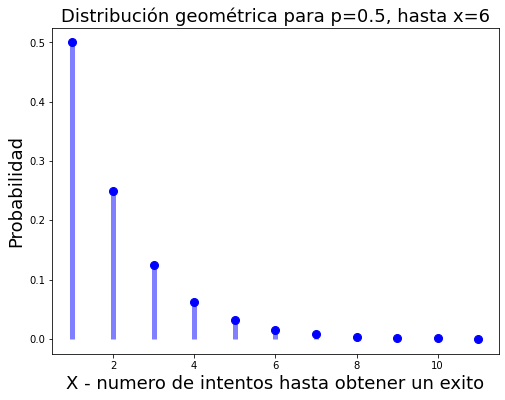

In [54]:
#Primero generamos la distribución teórica, digamos hasta un valor x=6

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] # en la distribucion geómetrica x empieza en 1 y no tiene límite
p = 0.5  # probabilidad teórica de tner un éxito (un varón en este caso)
#n = 14 # numero de niños

# Calculate geometric probability distribution
#
geom_pd = stats.geom.pmf(X, p) ## esta variable guarda las probabilidades por cada x
# multiplicamos por los 26 niños para obtener una frecuencia de observacion
print(geom_pd)
# Graficar la distribución de probabilidad

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probabilidad", fontsize="18")
plt.xlabel("X - numero de intentos hasta obtener un exito", fontsize="18")
plt.title("Distribución geométrica para p=0.5, hasta x=6", fontsize="18")
ax.vlines(X, 0, geom_pd, colors='b', lw=5, alpha=0.5)


In [30]:
mainpath = "/Users/vanotole/Documents/Doctorado/Estadistica/Datasets"
filename = "Gender Purchase.csv"
fullpath = os.path.join(mainpath,filename)

data = pd.read_csv(fullpath)
data.head(10)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes
5,Female,Yes
6,Male,No
7,Female,Yes
8,Female,No
9,Female,Yes


In [31]:
data.shape

(511, 2)

In [32]:
### Tabla de contigencia 
## Observar las frecuencias por dos o mas variables categóricas

tabla_contingencia = pd.crosstab(data["Gender"],data["Purchase"])
tabla_contingencia

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [33]:
tabla_contingencia.sum(axis = 1)

Gender
Female    265
Male      246
dtype: int64

In [34]:
tabla_contingencia.sum(axis = 0)

Purchase
No     231
Yes    280
dtype: int64

Probabilidad de haber comprado el producto dado que es mujer. A = compra, B = género

$P(A=compra|B=mujer) = \frac{159}{106+159} = \frac{159}{265}$

Probabilidad de que el cliente sea mujer dado que si me compró.

$P(B=mujer| A = compra)\frac{159}{121+159} = \frac{159}{280}$

In [35]:
# Queremos sumar por filas para hacer el total por género

tabla_contingencia.sum(axis = 1)

# vemos el número de hombres y de mujeres

Gender
Female    265
Male      246
dtype: int64

In [36]:
tabla_contingencia.sum(axis = 0)

# Aqui vemos los SI y los NO

Purchase
No     231
Yes    280
dtype: int64

Calculamos la proporcion de hombres que compraron y que no compraron, así como en el caso de mujeres.

In [37]:
tabla_contingencia.astype("float").div(tabla_contingencia.sum(axis=1), axis = 0)
##division
## cambiar de enteros a float para no tener problemas
## se hacen dos divisiones por su total

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187
